<a href="https://colab.research.google.com/github/GubioGL/Fundadamentos-da-computa-o-quantica/blob/main/Aula_2_SWAP_CNOT_and_bell_states.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Qiskit Tutorial: SWAP and CNOT gate.

In [ ]:
pip install qiskit qiskit-aer matplotlib

## Swap

Fazendo os importes

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [ ]:
# Create a 2-qubit circuit with 2 classical bits for measurement
qc = QuantumCircuit(2, 2)

# Prepare state |10> (qubit 0 = 1, qubit 1 = 0)
qc.x(0)

# Draw before swap
print("Circuito antes do SWAP:")
print(qc)

Circuito antes do SWAP:
     ┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
c: 2/═════
          


In [ ]:
# Measure both qubits into classical bits
qc.measure(qubit=[0,1],cbit=[0,1])

print(qc)

     ┌───┐┌─┐
q_0: ┤ X ├┤M├
     └┬─┬┘└╥┘
q_1: ─┤M├──╫─
      └╥┘  ║ 
c: 2/══╩═══╩═
       1   0 



Counts after swap: {'01': 100}


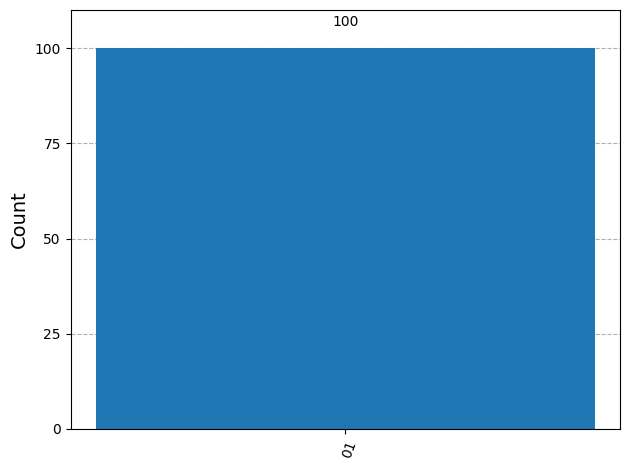

In [ ]:
# Simulate
# Inicializando a classe
sim = AerSimulator()

# Aplicando o circuito para rodar no simulador
compiled = transpile(qc, sim)

# Executando o simulador 100 vezes
result = sim.run(compiled, shots=100).result()

counts = result.get_counts()
print('\nCounts after swap:', counts)

plot_histogram(counts)

### Aplicando a porta swap

In [ ]:
# Create a 2-qubit circuit with 2 classical bits for measurement
qc = QuantumCircuit(2, 2)

# Prepare state |10> (qubit 0 = 1, qubit 1 = 0)
qc.x(0)

# Apply SWAP between qubit 0 and 1
qc.swap(0, 1)

# Draw before swap
print("Circuito Depois  do SWAP:")

# Measure both qubits into classical bits
qc.measure(qubit=[0,1],cbit=[0,1])

print(qc)

Circuito Depois  do SWAP:
     ┌───┐   ┌─┐   
q_0: ┤ X ├─X─┤M├───
     └───┘ │ └╥┘┌─┐
q_1: ──────X──╫─┤M├
              ║ └╥┘
c: 2/═════════╩══╩═
              0  1 



Counts after swap: {'10': 1000}


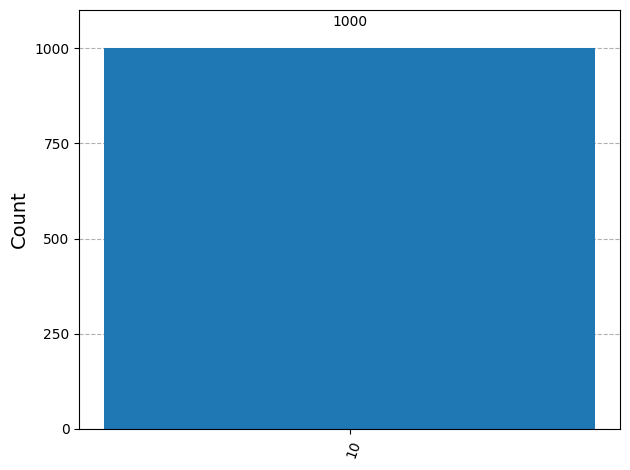

In [ ]:
# Simulate
# Inicializando a classe
sim = AerSimulator()

# Aplicando o circuito para rodar no simulador
compiled = transpile(qc, sim)

# Executando o simulador 1000 vezes
result = sim.run(compiled, shots=1000).result()

counts = result.get_counts()
print('\nCounts after swap:', counts)

plot_histogram(counts)

## CNOT

In [ ]:
# Circuito com 2 qubits e 2 bits clássicos
qc = QuantumCircuit(2, 2)

# Prepara |10> → controle=1, alvo=0
qc.x(0)          # qubit 0 = 1
qc.cx(0, 1)      # CNOT(control=0, target=1)
qc.measure([0,1], [0,1])
print(qc)

     ┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


In [ ]:
# Simulate
# Inicializando a classe
sim = AerSimulator()

# Aplicando o circuito para rodar no simulador
compiled = transpile(qc, sim)

# Executando o simulador 100 vezes
result = sim.run(compiled, shots=100).result()

counts = result.get_counts()
print('\nCounts after swap:', counts)



Counts after swap: {'11': 100}


## Estado de bell

In [ ]:
# Circuito com 2 qubits e 2 bits clássicos
qc = QuantumCircuit(2, 2)

# Prepara |10> → controle=1, alvo=0
qc.h(0)          # qubit 0 = 1
qc.cx(0, 1)      # CNOT(control=0, target=1)
qc.measure([0,1], [0,1])
print(qc)

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 



Counts after swap: {'11': 497, '00': 503}


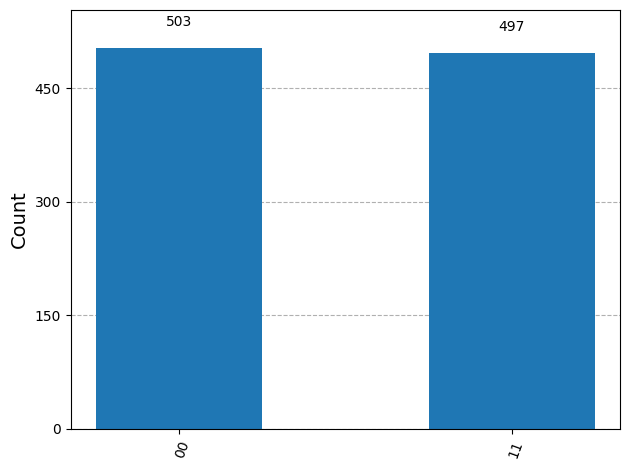

In [ ]:
# Simulate
# Inicializando a classe
sim = AerSimulator()

# Aplicando o circuito para rodar no simulador
compiled = transpile(qc, sim)

# Executando o simulador 100 vezes
result = sim.run(compiled, shots=1000).result()

counts = result.get_counts()
print('\nCounts after swap:', counts)
plot_histogram(counts)


## Teletransporte